In [44]:
import pandas as pd

df = pd.read_csv("/content/100_Unique_QA_Dataset.csv")
df.head()

,question,answer
0,What is the capital of France?,Paris
1,What is the capital of Germany?,Berlin
2,Who wrote 'To Kill a Mockingbird'?,Harper-Lee
3,What is the largest planet in our solar system?,Jupiter
4,What is the boiling point of water in Celsius?,100


## Tokenize

In [45]:
def tokenize(text):
  # text preprocessing
  text = text.lower()
  text = text.replace('?','')
  text = text.replace("'","")
  return text.split()

In [46]:
tokenize('What is the capital of France?')

['what', 'is', 'the', 'capital', 'of', 'france']

## Vocabulary

In [47]:
vocab = {'<UNK>':0}

In [48]:
def build_vocab(row):
  print(row['question'],row['answer'])
  tokenized_question = tokenize(row['question'])
  tokenized_answer = tokenize(row['answer'])
  merged_tokens = tokenized_question + tokenized_answer
  # print(merged_tokens)


  for token in merged_tokens:
    if token not in vocab:
      vocab[token] = len(vocab)


In [49]:
df.apply(build_vocab,axis=1)

What is the capital of France? Paris
What is the capital of Germany? Berlin
Who wrote 'To Kill a Mockingbird'? Harper-Lee
What is the largest planet in our solar system? Jupiter
What is the boiling point of water in Celsius? 100
Who painted the Mona Lisa? Leonardo-da-Vinci
What is the square root of 64? 8
What is the chemical symbol for gold? Au
Which year did World War II end? 1945
What is the longest river in the world? Nile
What is the capital of Japan? Tokyo
Who developed the theory of relativity? Albert-Einstein
What is the freezing point of water in Fahrenheit? 32
Which planet is known as the Red Planet? Mars
Who is the author of '1984'? George-Orwell
What is the currency of the United Kingdom? Pound
What is the capital of India? Delhi
Who discovered gravity? Newton
How many continents are there on Earth? 7
Which gas do plants use for photosynthesis? CO2
What is the smallest prime number? 2
Who invented the telephone? Alexander-Graham-Bell
What is the capital of Australia? Canber

,0
0,None
1,None
2,None
3,None
4,None
...,...
85,None
86,None
87,None
88,None


In [50]:
# unique number assign
vocab

{'<UNK>': 0,
 'what': 1,
 'is': 2,
 'the': 3,
 'capital': 4,
 'of': 5,
 'france': 6,
 'paris': 7,
 'germany': 8,
 'berlin': 9,
 'who': 10,
 'wrote': 11,
 'to': 12,
 'kill': 13,
 'a': 14,
 'mockingbird': 15,
 'harper-lee': 16,
 'largest': 17,
 'planet': 18,
 'in': 19,
 'our': 20,
 'solar': 21,
 'system': 22,
 'jupiter': 23,
 'boiling': 24,
 'point': 25,
 'water': 26,
 'celsius': 27,
 '100': 28,
 'painted': 29,
 'mona': 30,
 'lisa': 31,
 'leonardo-da-vinci': 32,
 'square': 33,
 'root': 34,
 '64': 35,
 '8': 36,
 'chemical': 37,
 'symbol': 38,
 'for': 39,
 'gold': 40,
 'au': 41,
 'which': 42,
 'year': 43,
 'did': 44,
 'world': 45,
 'war': 46,
 'ii': 47,
 'end': 48,
 '1945': 49,
 'longest': 50,
 'river': 51,
 'nile': 52,
 'japan': 53,
 'tokyo': 54,
 'developed': 55,
 'theory': 56,
 'relativity': 57,
 'albert-einstein': 58,
 'freezing': 59,
 'fahrenheit': 60,
 '32': 61,
 'known': 62,
 'as': 63,
 'red': 64,
 'mars': 65,
 'author': 66,
 '1984': 67,
 'george-orwell': 68,
 'currency': 69,
 'unit

In [51]:
len(vocab)

324

In [52]:
# convert words to numerical indices
def text_to_indices(text, vocab):

  indexed_text = []

  for token in tokenize(text):

    if token in vocab:
      indexed_text.append(vocab[token])
    else:
      indexed_text.append(vocab['<UNK>'])

  return indexed_text

In [53]:
text_to_indices('what is AI',vocab)

[1, 2, 0]

In [54]:
import torch
from torch.utils.data import Dataset, DataLoader

In [55]:
class QADataset(Dataset):

  def __init__(self,df,vocab):
    self.df = df
    self.vocab = vocab

  def __len__(self):
    return self.df.shape[0]

  def __getitem__(self,index):

    numerical_question = text_to_indices(self.df.iloc[index]['question'],self.vocab)
    numerical_answer = text_to_indices(self.df.iloc[index]['answer'], self.vocab)
    return torch.tensor(numerical_question), torch.tensor(numerical_answer)

In [56]:
# Class ko Object Creation
dataset = QADataset(df,vocab)

In [57]:
dataloader = DataLoader(dataset,batch_size = 1, shuffle=True)

In [58]:
for question, answer in dataloader:
  print(question, answer)

tensor([[1, 2, 3, 4, 5, 6]]) tensor([[7]])
tensor([[  1,   2,   3, 146,  86,  19, 192, 193]]) tensor([[194]])
tensor([[ 1,  2,  3, 33, 34,  5, 35]]) tensor([[36]])
tensor([[78, 79, 80, 81, 82, 83, 84]]) tensor([[85]])
tensor([[  1,   2,   3,  69,   5, 155]]) tensor([[156]])
tensor([[  1,   2,   3, 212,   5,  14, 213, 214]]) tensor([[215]])
tensor([[  1,   2,   3,   4,   5, 236, 237]]) tensor([[238]])
tensor([[ 42, 290, 291, 118, 292, 158, 293, 294]]) tensor([[295]])
tensor([[ 10,  75, 208]]) tensor([[209]])
tensor([[ 1,  2,  3, 59, 25,  5, 26, 19, 60]]) tensor([[61]])
tensor([[ 10,  11, 157, 158, 159]]) tensor([[160]])
tensor([[ 42, 137,   2, 226,  12,   3, 227, 228]]) tensor([[155]])
tensor([[ 10,  75,   3, 296,  19, 297]]) tensor([[298]])
tensor([[  1,   2,   3, 163, 164, 165,  83,  84]]) tensor([[166]])
tensor([[ 42,  18,   2,   3, 281,  12,   3, 282]]) tensor([[205]])
tensor([[ 42, 137,   2, 138,  39, 175, 269]]) tensor([[99]])
tensor([[  1,   2,   3,  33,  34,   5, 245]]) tensor([

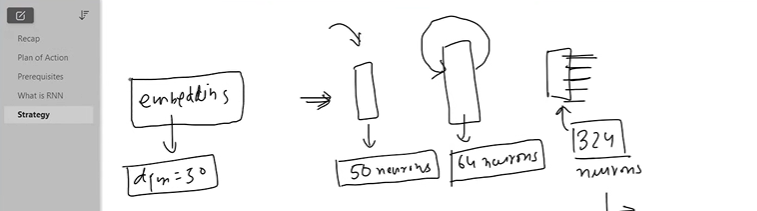

## RNN Architectur:

In [59]:
import torch.nn as nn

In [60]:
class SimpleRNN(nn.Module):

  def __init__(self, vocab_size):
    super().__init__()
    self.embedding = nn.Embedding(vocab_size, embedding_dim=50)
    self.rnn = nn.RNN(50, 64, batch_first=True)
    self.fc = nn.Linear(64, vocab_size)

  def forward(self, question):
    embedded_question = self.embedding(question)
    hidden, final = self.rnn(embedded_question)
    output = self.fc(final.squeeze(0))

    return output

In [ ]:
x = nn.Embedding(324, embedding_dim=50)
y = nn.RNN(50, 64, batch_first=True)
z = nn.Linear(64, 324)

a = dataset[0][0].reshape(1,6)
print("shape of a:", a.shape)
b = x(a)
print("shape of b:", b.shape)
c, d = y(b)
print("shape of c:", c.shape)
print("shape of d:", d.shape)

e = z(d.squeeze(0))

print("shape of e:", e.shape)

In [65]:
learning_rate = 0.001
epochs = 100

In [66]:
model = SimpleRNN(len(vocab))

In [67]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [68]:
# training loop

for epoch in range(epochs):

  total_loss = 0

  for question, answer in dataloader:

    optimizer.zero_grad()

    # forward pass
    output = model(question)

    # loss -> output shape (1,324) - (1)
    loss = criterion(output, answer[0])

    # gradients
    loss.backward()

    # update
    optimizer.step()

    total_loss = total_loss + loss.item()

  print(f"Epoch: {epoch+1}, Loss: {total_loss:4f}")

Epoch: 1, Loss: 527.646750
Epoch: 2, Loss: 456.360368
Epoch: 3, Loss: 375.443236
Epoch: 4, Loss: 315.218665
Epoch: 5, Loss: 265.254594
Epoch: 6, Loss: 217.749624
Epoch: 7, Loss: 175.249491
Epoch: 8, Loss: 137.399382
Epoch: 9, Loss: 106.843022
Epoch: 10, Loss: 82.685356
Epoch: 11, Loss: 64.786955
Epoch: 12, Loss: 51.008447
Epoch: 13, Loss: 40.968758
Epoch: 14, Loss: 33.205742
Epoch: 15, Loss: 27.502959
Epoch: 16, Loss: 22.823326
Epoch: 17, Loss: 19.345762
Epoch: 18, Loss: 16.443470
Epoch: 19, Loss: 14.225408
Epoch: 20, Loss: 12.386530
Epoch: 21, Loss: 10.845321
Epoch: 22, Loss: 9.421271
Epoch: 23, Loss: 8.387315
Epoch: 24, Loss: 7.444338
Epoch: 25, Loss: 6.634786
Epoch: 26, Loss: 5.965915
Epoch: 27, Loss: 5.393775
Epoch: 28, Loss: 4.897826
Epoch: 29, Loss: 4.442110
Epoch: 30, Loss: 4.054567
Epoch: 31, Loss: 3.755853
Epoch: 32, Loss: 3.427775
Epoch: 33, Loss: 3.164063
Epoch: 34, Loss: 2.916877
Epoch: 35, Loss: 2.705260
Epoch: 36, Loss: 2.507478
Epoch: 37, Loss: 2.336842
Epoch: 38, Loss: 

In [69]:
def predict(model, question, threshold=0.5):

  # convert question to numbers
  numerical_question = text_to_indices(question, vocab)

  # tensor
  question_tensor = torch.tensor(numerical_question).unsqueeze(0)

  # send to model
  output = model(question_tensor)

  # convert logits to probability using softmax
  probs = torch.nn.functional.softmax(output, dim=1)

  # find index of max probability
  value, index = torch.max(probs, dim=1)

  if value < threshold:
    print("I don't know")

  print(list(vocab.keys())[index])

In [70]:
predict(model, "What is the largest planet in our solar system?")

jupiter


In [76]:
predict(model, "what is AI")

I don't know
simpsons
